# SEIR with four age groups and yearly ageing
This is the Python version of program 3.4 from page 87 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [4]:
#Parameters (rates here are specified in terms of days)


m=4 #number age classes
mu=np.array([0.0,0.0,0.0,1.0/(55*365)]) #natural death rate
nu=np.array([1.0/(55*365),0.0,0.0,0.0]) #natural birth rate

n=np.array([6.0,4.0,10.0,55.0])/75.0    #initial fractions of population per age group
S0=np.array([0.05,0.01,0.01,0.008])     #initial susceptibles
E0=np.array([0.0001,0.0001,0.0001,0.0001]) #initial exposeds
I0=np.array([0.0001,0.0001,0.0001,0.0001]) #initial infecteds
R0= np.array([ 0.0298, 0.04313333, 0.12313333, 0.72513333]) #initial recovereds

beta=np.array(([2.089, 2.089, 2.086, 2.037], [2.089, 9.336, 2.086, 2.037], [2.086, 2.086, 2.086, 2.037], [2.037, 2.037, 2.037, 2.037])) #transmission rate matrix
gamma=1/5.0 #recovery rate
sigma=1/8.0 #1/incubation period

TS=1.0 #time step (one year)
ND=MaxTime=365. #maximum time (number of days)


INPUT=np.hstack((S0,E0,I0,R0)) #intial conditions

In [5]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((16))
	V = INP
	for i in range(m):
		Inf = np.dot(beta[i],  V[list(np.array(range(m))+2*m)]) *V[i]
		Y[i] = nu[i]*n[3] - Inf - mu[i] * V[i]
		Y[(m+i)] = Inf - mu[i] * V[(m+i)] - sigma * V[(m+i)]
		Y[(2*m+i)] = sigma * V[(m+i)] - gamma * V[(2*m+i)] - mu[i] * V[(2*m+i)]
		Y[(3*m+i)] = gamma * V[(2*m+i)] - mu[i] * V[(3*m+i)]
	return Y   # For odeint

In [6]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

RES2=np.zeros((16))
k=1
while k<=100:
	RES = spi.odeint(diff_eqs,INPUT,t_range)
	INPUT=RES[-1]
	INPUT[15]=INPUT[15]+INPUT[14]/10
	INPUT[14]=INPUT[14]+INPUT[13]/4-INPUT[14]/10
	INPUT[13]=INPUT[13]+INPUT[12]/6-INPUT[13]/4
	INPUT[12]=INPUT[12]-INPUT[12]/6
	
	INPUT[11]=INPUT[11]+INPUT[10]/10
	INPUT[10]=INPUT[10]+INPUT[9]/4-INPUT[10]/10
	INPUT[9]=INPUT[9]+INPUT[8]/6-INPUT[9]/4
	INPUT[8]=INPUT[8]-INPUT[8]/6
		
	INPUT[7]=INPUT[7]+INPUT[6]/10
	INPUT[6]=INPUT[6]+INPUT[5]/4-INPUT[6]/10
	INPUT[5]=INPUT[5]+INPUT[4]/6-INPUT[5]/4
	INPUT[4]=INPUT[4]-INPUT[4]/6
	
	INPUT[3]=INPUT[3]+INPUT[2]/10
	INPUT[2]=INPUT[2]+INPUT[1]/4-INPUT[2]/10
	INPUT[1]=INPUT[1]+INPUT[0]/6-INPUT[1]/4
	INPUT[0]=INPUT[0]-INPUT[0]/6
	RES2=np.vstack((RES2,RES))
	k=k+1

RES=RES2[1:,]


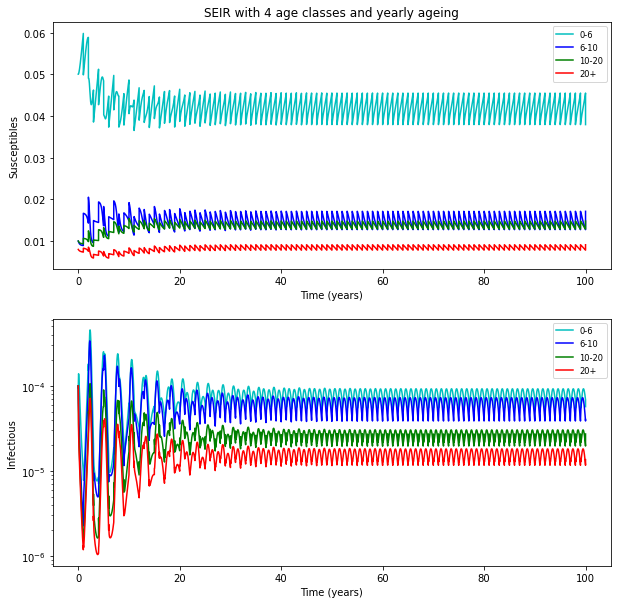

In [14]:
Time=np.arange(100*(ND+1))/(ND+1)

##Ploting
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('SEIR with 4 age classes and yearly ageing')

fig.add_subplot(211)
plt.plot(Time,RES[:,0], 'c', label='0-6')
plt.plot(Time,RES[:,1], 'b', label='6-10')
plt.plot(Time,RES[:,2], 'g', label='10-20')
plt.plot(Time,RES[:,3], 'r', label='20+')
plt.ylabel('Susceptibles')
plt.xlabel('Time (years)')
plt.legend(loc=1, prop = FontProperties(size='smaller'))

fig.add_subplot(212)
plt.semilogy(Time,RES[:,0+2*m], 'c', label='0-6')
plt.semilogy(Time,RES[:,1+2*m], 'b', label='6-10')
plt.semilogy(Time,RES[:,2+2*m], 'g', label='10-20')
plt.semilogy(Time,RES[:,3+2*m], 'r', label='20+')
plt.ylabel('Infectious')
plt.xlabel('Time (years)')
plt.legend(loc=1, prop = FontProperties(size='smaller'))


plt.show()
fig.savefig('SEIR_four_age_groups.pdf')